<a href="https://colab.research.google.com/github/jjpal/dk122022_data_dive/blob/main/SNAP__SVI__Map_Meal_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Identifying potential eligibility-enrollment gap localities

   ### Compare SNAP benefit uptake and measures of social vulnerability 

In [35]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### SUPPLEMENTAL NUTRITION ASSISTANCE PROGRAM (SNAP)

Column Headers

Substate, PersonsPublic, PersonsNonPublic, PersonsTotal,HouseholdsPublicAssistance, HouseholdsNonPublicAssistance, HouseholdsTotal,Issuance, month, year, countyFIPS, countyNAME, stateFIPS, stateNAME

In [36]:
# Processed Merged SNAP data
snap_merge_url = 'https://raw.githubusercontent.com/michaelbbryan/tools-and-kaggles/main/DataDive2022/snapmergecounty.csv'


In [37]:
# Load SNAP dataset
snap_merge_df = pd.read_csv(snap_merge_url)

In [38]:
# Only select year 2020 to match up with the other datasets
snap_county_2020_df = snap_merge_df[snap_merge_df['year'] == 2020]

In [39]:
# groupby on multiple columns and calculate a sum over each combination group.
snap_county_2020_df_new = snap_county_2020_df.groupby(['countyFIPS','year']).sum().reset_index()

In [40]:
# display sample of dataset
snap_county_2020_df_new.sample(3)

,countyFIPS,year,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,stateFIPS
969,21165,2020,19.0,2668.0,2687.0,9.0,1198.0,1207.0,381722.0,42
1606,39065,2020,691.0,5959.0,6650.0,612.0,2431.0,3043.0,947675.0,78
683,19001,2020,132.0,975.0,1107.0,89.0,473.0,562.0,155189.0,38


In [41]:
snap_county_2020_df_new.shape

(2536, 10)

### Social Vulnerability Indicators (selected columnss)


In [42]:
# social vulnerability indicators for 2020
svi2020_url = 'https://raw.githubusercontent.com/jjpal/dk122022_data_dive/main/SVI2020_US_COUNTY.csv'

# load svi dataset with selected columns
svi_2020_df = pd.read_csv(svi2020_url, usecols = ['STATE','ST_ABBR','COUNTY','FIPS','RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES'])

# display sample of dataset
svi_2020_df.sample(3)

,STATE,ST_ABBR,COUNTY,FIPS,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES
2858,Virginia,VA,Grayson,51077,0.6518,0.7549,0.3396,0.4348,0.6047
1106,Kentucky,KY,Union,21225,0.2524,0.1544,0.5137,0.2919,0.2231
1714,Nebraska,NE,Madison,31119,0.3218,0.6429,0.5598,0.7222,0.5417


In [43]:
svi_2020_df.shape

(3143, 9)

In [44]:
# merge previously merged SNAP data with svi2020 indicators
SNAP_SVI = pd.merge(snap_county_2020_df_new, svi_2020_df,left_on='countyFIPS',right_on='FIPS',how='inner')

In [45]:
SNAP_SVI.shape 

(2507, 19)

In [46]:
#SNAP_SVI.columns
SNAP_SVI.head(2)

,countyFIPS,year,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,stateFIPS,STATE,ST_ABBR,COUNTY,FIPS,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES
0,1001,2020,1977.0,13108.0,15085.0,1064.0,5764.0,6828.0,2219777.0,2,Alabama,AL,Autauga,1001,0.4045,0.7362,0.6337,0.4309,0.5325
1,1003,2020,3723.0,37358.0,41081.0,2229.0,16252.0,18481.0,6120282.0,2,Alabama,AL,Baldwin,1003,0.4112,0.2724,0.5022,0.3612,0.3552


### Map Meal Gap Data 

In [47]:
# map_meal_gap_data - with County sheet name
map_meal_gap_2020_df = pd.read_excel(io='https://github.com/jjpal/dk122022_data_dive/blob/main/MMG2022_2020-2019Data_ToShare.xlsx?raw=true', sheet_name ='County')

In [48]:
map_meal_gap_2020_df.shape

(6285, 23)

In [49]:
map_meal_gap_2020_df.head(1)

,FIPS,State,"County, State",Year,Overall Food Insecurity Rate (1 Year),# of Food Insecure Persons Overall (1 Year),Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",Low Threshold in state,...,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall
0,1001.0,AL,"Autauga County, Alabama",2020.0,0.145,8070.0,0.25,NaN,0.09,1.3,...,0.476,0.147,0.377,0.181,2380.0,0.71,0.29,3.22,17.092792,4184000.0


In [50]:
# rename State column which is the State abbreviation
map_meal_gap_2020_df.rename(columns = {"State":'State_Abbrev'}, inplace = True)

In [51]:
# separate County and State into different columns
map_meal_gap_2020_df[['County', 'States']] = map_meal_gap_2020_df['County, State'].str.split(pat = ',', expand = True)

map_meal_gap_2020_df = map_meal_gap_2020_df[map_meal_gap_2020_df['Year'] == 2020]
map_meal_gap_2020_df.drop('County, State', axis=1, inplace=True)

# Rename column
map_meal_gap_2020_df.rename(columns = {"States":'State'}, inplace = True)

In [52]:
# change the datatype to datetime
map_meal_gap_2020_df['Year'] = pd.to_datetime(map_meal_gap_2020_df['Year'], format='%Y')                            

In [53]:
# change the datatype
map_meal_gap_2020_df['FIPS'] = map_meal_gap_2020_df['FIPS'].astype(int)

In [54]:
# combine previously merged snap_svi df with map meal datase
map_svi_snap = pd.merge(SNAP_SVI, map_meal_gap_2020_df,left_on='FIPS',right_on='FIPS',how='inner')

In [55]:
print(map_svi_snap.shape)
print(map_svi_snap.columns)

(2507, 42)
Index(['countyFIPS', 'year', 'PersonsPublic', 'PersonsNonPublic',
       'PersonsTotal', 'HouseholdsPublicAssistance',
       'HouseholdsNonPublicAssistance', 'HouseholdsTotal', 'Issuance',
       'stateFIPS', 'STATE', 'ST_ABBR', 'COUNTY', 'FIPS', 'RPL_THEME1',
       'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES', 'State_Abbrev',
       'Year', 'Overall Food Insecurity Rate (1 Year)',
       '# of Food Insecure Persons Overall (1 Year)',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       'Low Threshold in state', 'Low Threshold Type',
       'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       'Child Food Insecurity Rate (1 Year)',
       '# of Food Insecure Children (1 Year)',
       '% food insecure children in HH w/ HH incomes 

In [56]:
# FIPS CODE B11001 from census households per county
census_table_url = 'https://raw.githubusercontent.com/michaelbbryan/tools-and-kaggles/main/DataDive2022/juanita.csv'

# load svi dataset with selected columns
census_FIPS_df = pd.read_csv(census_table_url, usecols = ['countyFIPS', 'HHCount'])

# display dataframe
census_FIPS_df.sample(3) 

,countyFIPS,HHCount
927,20077,2367.0
1296,26129,9314.0
660,17129,5211.0


In [57]:
# merge FIPS column to existing merged data and assign to a new df
census_map_svi_snap = pd.merge(census_FIPS_df, map_svi_snap,left_on='countyFIPS',right_on='countyFIPS',how='inner')

# display dataframe
census_map_svi_snap.sample(3)

,countyFIPS,HHCount,year,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,...,% FI > High Threshold,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,County,State
731,19115,4343.0,2020,245.0,1447.0,1692.0,173.0,609.0,782.0,242531.0,...,0.286,0.099,250.0,0.69,0.31,3.07,16.296206,376000.0,Louisa County,Iowa
402,13121,427379.0,2020,38325.0,289677.0,328002.0,24388.0,148367.0,172755.0,43183044.0,...,0.446,0.164,37490.0,0.66,0.34,4.14,21.954441,79122000.0,Fulton County,Georgia
1105,26039,6155.0,2020,596.0,2838.0,3434.0,563.0,1471.0,2034.0,491968.0,...,0.236,0.195,500.0,0.86,0.14,3.07,16.278611,1116000.0,Crawford County,Michigan


In [58]:
# calculation SNAP HouseholdsTotal/#census_household
census_map_svi_snap['HH_ratio'] = census_map_svi_snap['HouseholdsTotal'] / census_map_svi_snap['HHCount']

In [59]:
# Columns of 4 table merge of selected columns
census_map_svi_snap.columns

Index(['countyFIPS', 'HHCount', 'year', 'PersonsPublic', 'PersonsNonPublic',
       'PersonsTotal', 'HouseholdsPublicAssistance',
       'HouseholdsNonPublicAssistance', 'HouseholdsTotal', 'Issuance',
       'stateFIPS', 'STATE', 'ST_ABBR', 'COUNTY', 'FIPS', 'RPL_THEME1',
       'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES', 'State_Abbrev',
       'Year', 'Overall Food Insecurity Rate (1 Year)',
       '# of Food Insecure Persons Overall (1 Year)',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       'Low Threshold in state', 'Low Threshold Type',
       'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       'Child Food Insecurity Rate (1 Year)',
       '# of Food Insecure Children (1 Year)',
       '% food insecure children in HH w/ HH incomes 

In [60]:
# copy dataframe 
census_map_svi_snap_orig = census_map_svi_snap.copy()

# Remove duplicated columns
census_map_svi_snap.drop(['year', 'County', 'STATE','FIPS', 'ST_ABBR'], axis = 1, inplace = True)


In [61]:
census_map_svi_snap.shape

(2507, 39)

In [62]:
census_map_svi_snap.columns

Index(['countyFIPS', 'HHCount', 'PersonsPublic', 'PersonsNonPublic',
       'PersonsTotal', 'HouseholdsPublicAssistance',
       'HouseholdsNonPublicAssistance', 'HouseholdsTotal', 'Issuance',
       'stateFIPS', 'COUNTY', 'RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3',
       'RPL_THEME4', 'RPL_THEMES', 'State_Abbrev', 'Year',
       'Overall Food Insecurity Rate (1 Year)',
       '# of Food Insecure Persons Overall (1 Year)',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       'Low Threshold in state', 'Low Threshold Type',
       'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       'Child Food Insecurity Rate (1 Year)',
       '# of Food Insecure Children (1 Year)',
       '% food insecure children in HH w/ HH incomes below 185 FPL',
       '% food insec

In [63]:
census_map_svi_snap.dtypes

countyFIPS                                                             int64
HHCount                                                              float64
PersonsPublic                                                        float64
PersonsNonPublic                                                     float64
PersonsTotal                                                         float64
HouseholdsPublicAssistance                                           float64
HouseholdsNonPublicAssistance                                        float64
HouseholdsTotal                                                      float64
Issuance                                                             float64
stateFIPS                                                              int64
COUNTY                                                                object
RPL_THEME1                                                           float64
RPL_THEME2                                                           float64

In [64]:
census_map_svi_snap.describe()

,countyFIPS,HHCount,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,stateFIPS,...,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,HH_ratio
count,2507.000000,2.507000e+03,2507.000000,2.507000e+03,2.507000e+03,2507.000000,2.507000e+03,2.507000e+03,2.507000e+03,2507.000000,...,1628.000000,2507.000000,2507.000000,2507.000000,2506.000000,2506.000000,2507.000000,2507.000000,2.507000e+03,2507.000000
mean,30069.038293,3.874804e+04,3042.984045,2.253221e+04,2.557520e+04,2021.794575,1.081152e+04,1.283331e+04,3.533669e+06,61.537296,...,0.144225,0.281774,0.176666,4022.010371,0.788990,0.212023,3.202218,16.997450,6.636038e+06,0.334259
std,15700.257732,1.214748e+05,16148.509860,7.922927e+04,9.170996e+04,10395.590994,4.060317e+04,4.898269e+04,1.361291e+07,38.578240,...,0.088636,0.114345,0.064276,15388.011125,0.128726,0.128878,0.347466,1.843372,2.374913e+07,0.224753
min,1001.000000,6.200000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.190000,11.643379,1.600000e+04,0.000000
25%,18090.000000,4.854000e+03,106.000000,2.625500e+03,2.939500e+03,49.000000,1.184500e+03,1.393500e+03,3.730350e+05,36.000000,...,0.073750,0.214500,0.131000,450.000000,0.710000,0.120000,2.990000,15.863886,7.950000e+05,0.192262
50%,27173.000000,1.046500e+04,546.000000,6.334000e+03,7.084000e+03,379.000000,2.885000e+03,3.420000e+03,8.948250e+05,56.000000,...,0.129000,0.283000,0.172000,1030.000000,0.790000,0.210000,3.150000,16.744836,1.765000e+06,0.300900
75%,46092.000000,2.641350e+04,1785.500000,1.593400e+04,1.758350e+04,1249.000000,7.321500e+03,8.489000e+03,2.319782e+06,94.000000,...,0.202000,0.352000,0.212000,2590.000000,0.880000,0.290000,3.340000,17.735290,4.377500e+06,0.427347
max,55141.000000,3.332504e+06,660741.000000,1.891999e+06,2.552740e+06,413773.000000,1.070090e+06,1.483863e+06,3.979753e+08,1122.000000,...,0.540000,0.690000,0.464000,438950.000000,1.000000,1.000000,9.000000,47.772544,7.554500e+08,5.794378


In [ ]:
# Identify outliers with more than 3 standard deviations from the mean
census_map_svi_snap.loc[ \
    (census_map_svi_snap['HH_ratio'] < (census_map_svi_snap['HH_ratio'].mean() - 3 * census_map_svi_snap['HH_ratio'].std())) \
    | (census_map_svi_snap['HH_ratio'] > (census_map_svi_snap['HH_ratio'].mean() + 3 * census_map_svi_snap['HH_ratio'].std())
    )
]

In [66]:
# Drop extreme outliers
indexdrop = \
     census_map_svi_snap.loc[(census_map_svi_snap['HH_ratio'] < (census_map_svi_snap['HH_ratio'].mean() - 3 * census_map_svi_snap['HH_ratio'].std())) \
                             | (census_map_svi_snap['HH_ratio'] > (census_map_svi_snap['HH_ratio'].mean() + 3 * census_map_svi_snap['HH_ratio'].std()))].index

census_map_svi_snap.drop(index=indexdrop, inplace = True)

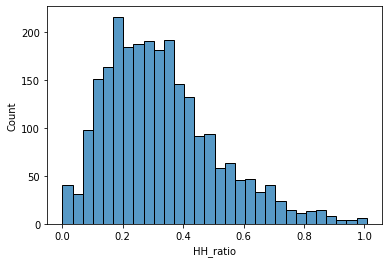

In [67]:
sns.histplot(census_map_svi_snap['HH_ratio'], bins='auto')

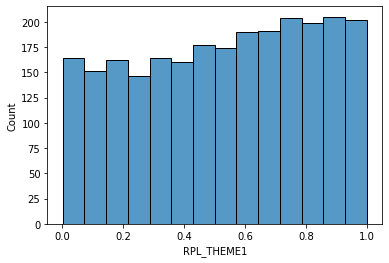

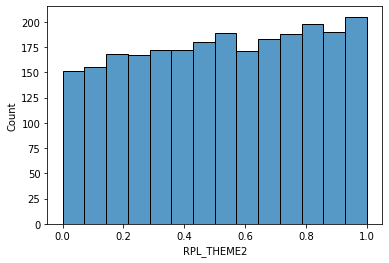

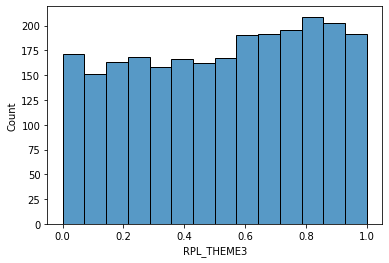

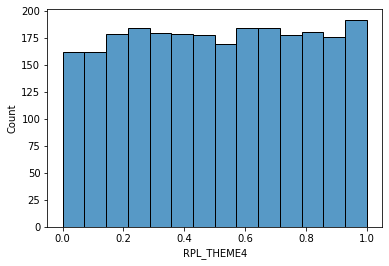

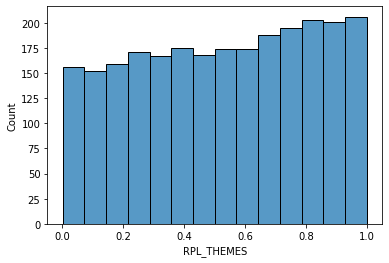

In [68]:
for theme in ['RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4','RPL_THEMES']:
     sns.histplot(data = census_map_svi_snap[theme], bins='auto')
     plt.show()     

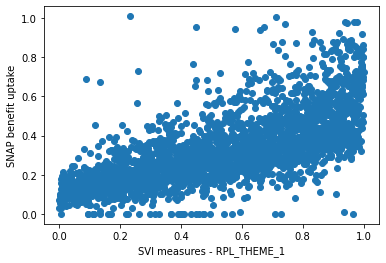

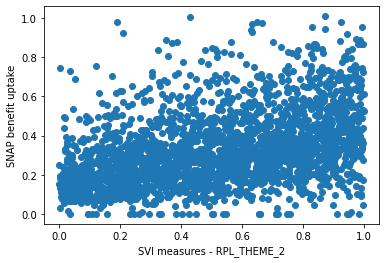

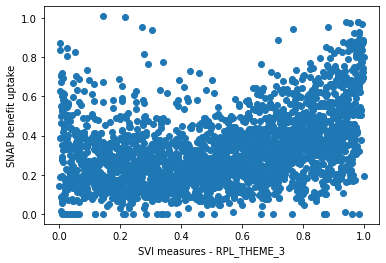

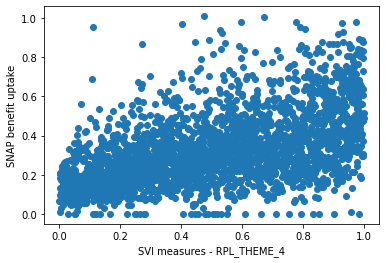

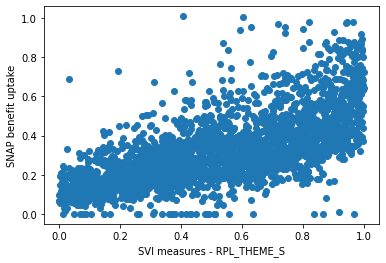

In [69]:
y = census_map_svi_snap['HH_ratio']

for theme in ['1','2','3','4','S']:
      x = census_map_svi_snap['RPL_THEME' + theme]
      plt.scatter(x, y)
      plt.xlabel('SVI measures - RPL_THEME_' + theme)
      plt.ylabel('SNAP benefit uptake')
      plt.show()

In [70]:
pearson_coeff_rts = census_map_svi_snap["RPL_THEMES"].corr(census_map_svi_snap['HH_ratio'], method="pearson") 
pearson_coeff_rts

0.685265034675182

In [71]:
pearson_coeff_rt1 = census_map_svi_snap["RPL_THEME1"].corr(census_map_svi_snap['HH_ratio'], method="pearson") 
pearson_coeff_rt1

0.7043559332020533

In [72]:
pearson_coeff_rt2 = census_map_svi_snap["RPL_THEME2"].corr(census_map_svi_snap['HH_ratio'], method="pearson") 
pearson_coeff_rt2

0.4246708297757566

In [73]:
pearson_coeff_rt3 = census_map_svi_snap["RPL_THEME3"].corr(census_map_svi_snap['HH_ratio'], method="pearson") 
pearson_coeff_rt3

0.3977206395273452

In [74]:
pearson_coeff_rt4 = census_map_svi_snap["RPL_THEME4"].corr(census_map_svi_snap['HH_ratio'], method="pearson") 
pearson_coeff_rt4

0.5186911502476175

In [75]:
np.corrcoef(x,y)

array([[1.        , 0.68526503],
       [0.68526503, 1.        ]])

### Check regression to see how they predict together - linear coefficients with their statistical significance.

In [76]:
census_map_svi_snap.corr()

,countyFIPS,HHCount,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,stateFIPS,...,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,HH_ratio
countyFIPS,1.000000,-0.068898,-0.078798,-0.063744,-0.068946,-0.069624,-0.068222,-0.071328,-0.068722,0.797696,...,-0.246666,0.003502,-0.004139,-0.050406,-0.079619,0.079323,-0.109570,-0.109308,-0.072900,-0.083045
HHCount,-0.068898,1.000000,0.777707,0.940978,0.949868,0.768380,0.944966,0.946377,0.945623,0.130930,...,-0.142762,0.119020,-0.032017,0.951533,-0.119738,0.120194,0.217581,0.217439,0.984032,0.005275
PersonsPublic,-0.078798,0.777707,1.000000,0.731795,0.808315,0.990388,0.767469,0.846376,0.809536,-0.000245,...,-0.081861,0.001935,0.035480,0.776166,-0.053241,0.052842,0.149974,0.149850,0.831880,0.080623
PersonsNonPublic,-0.063744,0.940978,0.731795,1.000000,0.992769,0.727611,0.994984,0.979182,0.986927,0.192704,...,-0.125714,0.029840,0.071909,0.966035,-0.089243,0.089623,0.131688,0.131513,0.948614,0.110521
PersonsTotal,-0.068946,0.949868,0.808315,0.992769,1.000000,0.803008,0.994719,0.994967,0.995168,0.166428,...,-0.125627,0.026119,0.068369,0.971243,-0.086472,0.086730,0.140177,0.140004,0.966007,0.109677
HouseholdsPublicAssistance,-0.069624,0.768380,0.990388,0.727611,0.803008,1.000000,0.761253,0.843265,0.800535,-0.008868,...,-0.065647,0.006255,0.038333,0.766428,-0.056396,0.056125,0.153760,0.153657,0.823186,0.081249
HouseholdsNonPublicAssistance,-0.068222,0.944966,0.767469,0.994984,0.994719,0.761253,1.000000,0.990481,0.990464,0.200595,...,-0.121831,0.029159,0.063903,0.957336,-0.089375,0.089695,0.141401,0.141226,0.955770,0.107364
HouseholdsTotal,-0.071328,0.946377,0.846376,0.979182,0.994967,0.843265,0.990481,1.000000,0.990916,0.164389,...,-0.120815,0.025497,0.061105,0.956216,-0.086054,0.086261,0.149844,0.149677,0.966966,0.106240
Issuance,-0.068722,0.945623,0.809536,0.986927,0.995168,0.800535,0.990464,0.990916,1.000000,0.173846,...,-0.124863,0.025465,0.068014,0.972057,-0.086292,0.086503,0.129488,0.129316,0.966389,0.103404
stateFIPS,0.797696,0.130930,-0.000245,0.192704,0.166428,-0.008868,0.200595,0.164389,0.173846,1.000000,...,-0.238964,0.012460,-0.029777,0.109284,-0.055901,0.055597,-0.052271,-0.052138,0.096711,-0.081024
